In [14]:
import cv2
import matplotlib.pyplot as plt
import re
def draw_bounding_boxes(image_path, label_path):
    """
    Draw bounding boxes on the image based on YOLOv8 format labels with specific colors for classes.

    Args:
        image_path (str): Path to the original image.
        label_path (str): Path to the YOLOv8 label file.
        output_path (str): Path to save the output image with bounding boxes.
    """
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Cannot load image from {image_path}")
    height, width, _ = image.shape

    # Define colors for each class
    class_colors = {
        0: (255, 0, 0),  # Blue for pointed
        1: (0, 255, 0)   # Green for unpointed
    }
    class_names = {
        0: "pointed",
        1: "unpointed"
    }

    # Read the label file
    with open(label_path, 'r') as file:
        labels = file.readlines()

    # Iterate over each line in the label file
    for label in labels:
        parts = label.strip().split()
        if len(parts) < 5:
            continue  # Skip invalid lines
        class_id, x_center, y_center, box_width, box_height = map(float, parts)

        # Convert YOLO normalized coordinates to pixel coordinates
        x_center *= width
        y_center *= height
        box_width *= width
        box_height *= height

        # Calculate the top-left and bottom-right corners of the bounding box
        x1 = int(x_center - box_width / 2)
        y1 = int(y_center - box_height / 2)
        x2 = int(x_center + box_width / 2)
        y2 = int(y_center + box_height / 2)

        # Get color and label for the class
        color = class_colors.get(int(class_id), (0, 0, 255))  # Default: Red for unknown classes
        label_text = class_names.get(int(class_id), f"Class {int(class_id)}")

        # Draw the bounding box and label
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    return image




In [13]:
# Example usage
image_path = r"D:\testset1\images\IMG_3960_iter_0.jpg"
label_path = r"D:\process_testset1\sorted_results.txt"


image = draw_bounding_boxes(image_path, label_path)

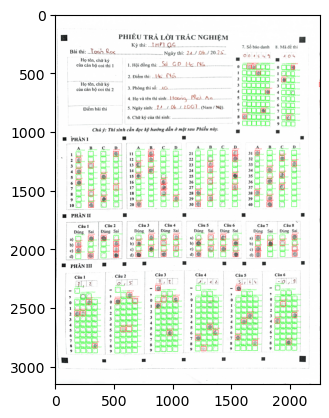

In [14]:
plt.imshow(image)

In [7]:
cv2.imwrite("detect_3960.jpg", image)

True

In [2]:
file_path = "D:\process_testset1\IMG_3960_iter_0.txt"

row_threshold = 0.01
with open(file_path, 'r') as file:
    lines = file.readlines()

# Parse lines into tuples: (original_line, class_id, x_center, y_center, width, height)
parsed_lines = [
    (line.strip(), tuple(map(float, line.strip().split(' ')[1:3]))) for line in lines if line.strip().split()[0] == '0'
]

parsed_lines = sorted(parsed_lines,key=lambda x: x[1][1]) 

rows = []
current_row = [parsed_lines[0]]

for i in range(1, len(parsed_lines)):
    if abs(parsed_lines[i][1][1] - current_row[-1][1][1]) < row_threshold:
        current_row.append(parsed_lines[i])
    else:
        current_row  = sorted(current_row, key = lambda pt: pt[1][0])
        rows.append(current_row)
        current_row = [parsed_lines[i]]
if current_row:
    current_row = sorted(current_row, key=lambda pt:pt[1][0])
    rows.append(current_row)


return_row = []
for row in rows:
    return_row.extend(row)
return_row = [row[0] for row in return_row]

return_row = [list(map(float, line[1:].strip().split())) for line in return_row]
return_row = [row for row in return_row if row[1] < 0.95 and row[0] < 0.95]

#========================================================================================================

dic = dict()
keys = ['SBD1', 'SBD2', 'SBD3', 'SBD4', 'SBD5', 'SBD6', 'MDT1', 'MDT2', 'MDT3']
#=================part0=============
first_nine_row = return_row[0:9]
first_nine_row = sorted(first_nine_row, key = lambda x: x[1])

for i, key in enumerate(keys):
    dic[key] = first_nine_row[i]

#=================================

#==========part1==================
for index in range(0, 9):
    keys = [f'1.{index+1}', f'1.1{index+1}', f'1.2{index+1}', f'1.3{index+1}']

    next = return_row[9+i*4:13+i*4]
    next = sorted(next, key = lambda x: x[1])

    for i, key in enumerate(keys):
        dic[key] = next[i]
keys = ['1.10', '1.20', '1.30', '1.40']
next = return_row[45:49]
next = sorted(next, key = lambda x: x[1])

for i, key in enumerate(keys):
    dic[key] = next[i]

#====================================

#=============part2=====================
index = 49


for i in ['a', 'b', 'c', 'd']:
    for j in range(1, 9):
        dic[f"2.{j}.{i}"] =  return_row[index]
        index += 1
#index = 81


#============part3======================

keys = ["3.1", "3.2", "3.3", "3.4", "3.5", "3.6"]
final_row = return_row[index:]
final_row = sorted(final_row, key = lambda x: (x[0],x[1]))

groups = []
current_group = [final_row[0]]

col_threshold = 0.07
for i in range(len(final_row)):
    if abs(final_row[i][1] - current_group[-1][1]) < col_threshold:
        current_group.append(final_row[i])
    else:
        groups.append(current_group)
        current_group = [final_row[i]]
if current_group:
    groups.append(current_group)

i=0
for key in keys:
    dic[key] = groups[i]
    i += 1




<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\dmvns00008\AppData\Local\Temp\ipykernel_10652\3723265937.py:1: SyntaxWarning: invalid escape sequence '\p'
  file_path = "D:\process_testset1\IMG_3960_iter_0.txt"


In [26]:
string = "IMG_3960_iter_0.jpg "
for i in range(1, 7):
    string += f"""SBD{i} {dic[f"SBD{i}"][0]},{dic[f"SBD{i}"][1]},{dic[f"SBD{i}"][2]},{dic[f"SBD{i}"][3]} """

for i in range(1,4):
    string += f"""MDT{i} {dic[f"MDT{i}"][0]},{dic[f"MDT{i}"][1]},{dic[f"MDT{i}"][2]},{dic[f"MDT{i}"][3]} """

for i in range(1,41):
    string += f"""1.{i} {dic[f"1.{i}"][0]},{dic[f"1.{i}"][1]},{dic[f"1.{i}"][2]},{dic[f"1.{i}"][3]} """


for j in ['a','b','c','d']:
    for i in range(1,3):
        string += f"""2.{i}.{j} {dic[f"2.{i}.{j}"][0]},{dic[f"2.{i}.{j}"][1]},{dic[f"2.{i}.{j}"][2]},{dic[f"2.{i}.{j}"][3]} """

for j in ['a','b','c','d']:
    for i in range(3,5):
        string += f"""2.{i}.{j} {dic[f"2.{i}.{j}"][0]},{dic[f"2.{i}.{j}"][1]},{dic[f"2.{i}.{j}"][2]},{dic[f"2.{i}.{j}"][3]} """

for j in ['a','b','c','d']:
    for i in range(5,7):
        string += f"""2.{i}.{j} {dic[f"2.{i}.{j}"][0]},{dic[f"2.{i}.{j}"][1]},{dic[f"2.{i}.{j}"][2]},{dic[f"2.{i}.{j}"][3]} """

for j in ['a','b','c','d']:
    for i in range(7,9):
        string += f"""2.{i}.{j} {dic[f"2.{i}.{j}"][0]},{dic[f"2.{i}.{j}"][1]},{dic[f"2.{i}.{j}"][2]},{dic[f"2.{i}.{j}"][3]} """

keys = ["3.1", "3.2", "3.3", "3.4", "3.5", "3.6"]

k = 0
for key in keys:
    stri = ""
    for i in range(len(groups)):
        for j in range(len(groups[i])):
            stri += f""" {groups[i][j]}"""
    stri = stri.replace(']', '')
    stri = stri.replace('[', '')
    stri = stri.replace('[', '')
    stri = stri.replace(', ',',')
    stri = stri.strip()

    string += f"{key} {stri} "


In [27]:
string

'IMG_3960_iter_0.jpg SBD1 0.7497778385809313,0.14288279498571882,0.01539207299334812,0.010343845414154236 SBD2 0.7324172203991132,0.14307194827039035,0.014792327893569846,0.010462722183433831 SBD3 0.8978626159645232,0.1442679609647731,0.01249812,0.011304003935258648 SBD4 0.7674062776053215,0.15958722310377657,0.015581624434589802,0.010522072453189465 SBD5 0.8626590541019955,0.17793411266264678,0.015373443325942353,0.011179703205331641 SBD6 0.8022344563192905,0.21052545858457633,0.015687543858093126,0.010602119930180894 MDT1 0.78543117827051,0.26116018724214535,0.015221864168514412,0.01070807318311647 MDT2 0.7153063513525499,0.2775979209774675,0.0158247400443459,0.011031474389082833 MDT3 0.8813324283813747,0.2801763582989527,0.014623049002217298,0.010924091716915265 1.1 0.585712244789357,0.49825524722310377,0.018532560886917956,0.01313744715963186 1.2 0.8094067631929046,0.42081819041574103,0.0194654733481153,0.013378261377340526 1.3 0.8094067631929046,0.42081819041574103,0.0194654733481

In [9]:
with open(f"results.txt" , 'a') as file:
    file.write(string)